## Curvas ROC

Uma alternativa visual para medir o desempenho preditivo de um classificador binário são as curvas ROC (*Receiver Operating Characteristic*). Uma curva ROC representa a capacidade de um modelo de discriminar entre classes positivas e negativas. 

A figura a seguir apresenta um exemplo esquemático das curvas ROC. Em geral, o gráfico da curva ROC para é criado plotando a FPR (no eixo horizontal) contra a TPR (no eixo vertical) para um ou mais classificadores, para vários valores limítrofes de classificação diferentes. Outra forma de interpretar uma curva ROC é percebendo que ela plota valores (1-especificidade) x sensibilidade.

![alt text](https://docs.eyesopen.com/toolkits/cookbook/python/_images/roc-theory-small.png)

Um aspecto interessante desse gráfico é que a área abaixo da curva (*area under the curve*, AUC) correspondente a um classificador está associada ao seu desempenho preditivo: quanto maior a área, melhor o classificador. Uma área de 1,0 representa um modelo que fez todas as previsões perfeitamente. Uma área próxima de 0,5 representa um modelo completamente aleatório.

Podemos obter a AUC importando roc_auc_score de sklearn.metrics,


Para desenhar uma curva ROC, é necessário computar as medidas TPR e FPR para vários valores limítrofes, por meio da função `roc_curve`.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, roc_curve, f1_score

from sklearn.model_selection import train_test_split
from numpy import loadtxt

dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")

# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# split data into train and test sets
seed = 7
test_size = 0.33
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=test_size, random_state=seed)

modelLR = LogisticRegression(solver='lbfgs')
modelLR.fit(train_X, train_Y)
y_pred_prob_lr = modelLR.predict_proba(test_X)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_Y, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

print(fpr_lr)
print(tpr_lr)
print(thresholds_lr)
print(roc_auc_lr)

OSError: pima-indians-diabetes.csv not found.

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [ ]:
from sklearn.model_selection import train_test_split
from numpy import loadtxt

dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")

# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# split data into train and test sets
seed = 7
test_size = 0.33
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
# adaptado de https://www.kaggle.com/mnpathak1/model-comparison-with-roc-curves-and-more

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Logistic regression
modelLR = LogisticRegression(solver='lbfgs')
modelLR.fit(train_X,train_Y)
y_pred_prob_lr = modelLR.predict_proba(test_X)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_Y, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
precision_lr, recall_lr, th_lr = precision_recall_curve(test_Y, y_pred_prob_lr)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(train_X,train_Y)
y_pred_prob_KNN = modelKNN.predict_proba(test_X)[:,1]
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(test_Y, y_pred_prob_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
precision_KNN, recall_KNN, th_KNN = precision_recall_curve(test_Y, y_pred_prob_KNN)


# Decision Tree
modelTree=DecisionTreeClassifier()
modelTree.fit(train_X,train_Y)
y_pred_prob_Tree = modelTree.predict_proba(test_X)[:,1]
fpr_Tree, tpr_Tree, thresholds_Tree = roc_curve(test_Y, y_pred_prob_Tree)
roc_auc_Tree = auc(fpr_Tree, tpr_Tree)
precision_Tree, recall_Tree, th_Tree = precision_recall_curve(test_Y, y_pred_prob_Tree)

# Naive Bayes
modelNB= GaussianNB()
modelNB.fit(train_X,train_Y)
y_pred_prob_nb = modelNB.predict_proba(test_X)[:,1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(test_Y, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)
precision_nb, recall_nb, th_nb = precision_recall_curve(test_Y, y_pred_prob_nb)


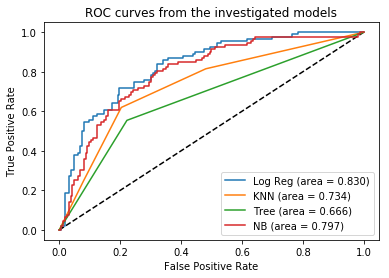

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Log Reg (area = %0.3f)' % roc_auc_lr)
plt.plot(fpr_KNN, tpr_KNN, label='KNN (area = %0.3f)' % roc_auc_KNN)
plt.plot(fpr_Tree, tpr_Tree, label='Tree (area = %0.3f)' % roc_auc_Tree)
plt.plot(fpr_nb, tpr_nb, label='NB (area = %0.3f)' % roc_auc_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()